<a href="https://colab.research.google.com/github/hemantvpandit333/Stock-Price-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [107]:
from zipfile import ZipFile

file_name = '/content/drive/My Drive/Machine Learning/Stock Price Prediction/Nifty 50 dataset.zip'
with ZipFile(file_name , 'r') as zip:
  zip.extractall()
  print('done')

done


In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import math
from sklearn.preprocessing import MinMaxScaler, minmax_scale
from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [109]:
data = pd.read_csv('BAJAJFINSV.csv')
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.00,505.10,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.10,564.00,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.00,643.00,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.00,634.50,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.30,647.00,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,2021-04-26,BAJAJFINSV,EQ,9916.65,9992.00,10125.00,9902.20,10000.85,10001.75,9995.72,419596,4.194163e+14,45113.0,77816,0.1855
3197,2021-04-27,BAJAJFINSV,EQ,10001.75,10000.00,10133.00,9964.70,10133.00,10091.35,10036.76,342847,3.441072e+14,40414.0,77723,0.2267
3198,2021-04-28,BAJAJFINSV,EQ,10091.35,10200.00,10615.95,10151.15,10480.00,10489.30,10445.96,1113881,1.163556e+15,126354.0,133587,0.1199
3199,2021-04-29,BAJAJFINSV,EQ,10489.30,10540.00,11300.00,10520.00,11175.45,11176.55,10980.40,1696498,1.862822e+15,165425.0,195324,0.1151


In [110]:
data = data [['Date','Prev Close', 'Open', 'High', 'Low', 'Close']]
data

,Date,Prev Close,Open,High,Low,Close
0,2008-05-26,2101.05,600.00,619.00,501.00,509.10
1,2008-05-27,509.10,505.00,610.95,491.10,554.65
2,2008-05-28,554.65,564.00,665.60,564.00,640.95
3,2008-05-29,640.95,656.65,703.00,608.00,632.40
4,2008-05-30,632.40,642.40,668.00,588.30,644.00
...,...,...,...,...,...,...
3196,2021-04-26,9916.65,9992.00,10125.00,9902.20,10001.75
3197,2021-04-27,10001.75,10000.00,10133.00,9964.70,10091.35
3198,2021-04-28,10091.35,10200.00,10615.95,10151.15,10489.30
3199,2021-04-29,10489.30,10540.00,11300.00,10520.00,11176.55


In [111]:
stock_open = data['Open']
stock_high = data['High']
stock_low = data['Low']
stock_close = data['Close']

#1. Feature Engineering

In [112]:
#change in price for a particular day
change_between_close = data['Close'] - data['Prev Close']
data['change_between_close'] = change_between_close
data['change_between_close']

high_minus_close = data['High'] - data['Close']
data['high_minus_close'] = high_minus_close

low_minus_close = data['Low'] - data['Close']
data['low_minus_close'] = low_minus_close

high_minus_open = data['High'] - data['Open']
data['high_minus_open'] = high_minus_open

low_minus_open = data['Low'] - data['Open']
data['low_minus_open'] = low_minus_open
 
high_minus_low = data['High'] - data['Low']
data['high_minus_low'] = high_minus_low

data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,Date,Prev Close,Open,High,Low,Close,change_between_close,high_minus_close,low_minus_close,high_minus_open,low_minus_open,high_minus_low
0,2008-05-26,2101.05,600.00,619.00,501.00,509.10,-1591.95,109.90,-8.10,19.00,-99.00,118.00
1,2008-05-27,509.10,505.00,610.95,491.10,554.65,45.55,56.30,-63.55,105.95,-13.90,119.85
2,2008-05-28,554.65,564.00,665.60,564.00,640.95,86.30,24.65,-76.95,101.60,0.00,101.60
3,2008-05-29,640.95,656.65,703.00,608.00,632.40,-8.55,70.60,-24.40,46.35,-48.65,95.00
4,2008-05-30,632.40,642.40,668.00,588.30,644.00,11.60,24.00,-55.70,25.60,-54.10,79.70
...,...,...,...,...,...,...,...,...,...,...,...,...
3196,2021-04-26,9916.65,9992.00,10125.00,9902.20,10001.75,85.10,123.25,-99.55,133.00,-89.80,222.80
3197,2021-04-27,10001.75,10000.00,10133.00,9964.70,10091.35,89.60,41.65,-126.65,133.00,-35.30,168.30
3198,2021-04-28,10091.35,10200.00,10615.95,10151.15,10489.30,397.95,126.65,-338.15,415.95,-48.85,464.80
3199,2021-04-29,10489.30,10540.00,11300.00,10520.00,11176.55,687.25,123.45,-656.55,760.00,-20.00,780.00


# Train Test Split

Getting Training Data


In [113]:
training_size = math.ceil(0.66 * data.shape[0])
training_size

2113

GettiTesting Data 

In [114]:
test_size = data.shape[0] - training_size
test_size


1088

In [115]:
train_data = data[:training_size]
train_data = train_data.drop(['Date'], axis = 1)
train_data

,Prev Close,Open,High,Low,Close,change_between_close,high_minus_close,low_minus_close,high_minus_open,low_minus_open,high_minus_low
0,2101.05,600.00,619.00,501.00,509.10,-1591.95,109.90,-8.10,19.00,-99.00,118.00
1,509.10,505.00,610.95,491.10,554.65,45.55,56.30,-63.55,105.95,-13.90,119.85
2,554.65,564.00,665.60,564.00,640.95,86.30,24.65,-76.95,101.60,0.00,101.60
3,640.95,656.65,703.00,608.00,632.40,-8.55,70.60,-24.40,46.35,-48.65,95.00
4,632.40,642.40,668.00,588.30,644.00,11.60,24.00,-55.70,25.60,-54.10,79.70
...,...,...,...,...,...,...,...,...,...,...,...
2108,2990.00,3009.00,3019.00,2930.25,2939.30,-50.70,79.70,-9.05,10.00,-78.75,88.75
2109,2939.30,2935.00,2999.00,2923.05,2977.65,38.35,21.35,-54.60,64.00,-11.95,75.95
2110,2977.65,2990.00,3095.00,2980.00,3031.65,54.00,63.35,-51.65,105.00,-10.00,115.00
2111,3031.65,3029.00,3044.00,2990.00,2999.00,-32.65,45.00,-9.00,15.00,-39.00,54.00


In [116]:
train_data.shape


(2113, 11)

In [117]:
X_train = train_data[['Prev Close',	'Open',	'High',	'Low',	'change_between_close',	'high_minus_close',	'low_minus_close',	'high_minus_open',	'low_minus_open']]
y_train = train_data[['Close']]

X_train.shape, y_train.shape

((2113, 9), (2113, 1))

# Feature Scaling

In [118]:
scalerX = MinMaxScaler()
scalerY = MinMaxScaler()

X_train = scalerX.fit_transform(X_train)
y_train = scalerY.fit_transform(y_train)

X_train, y_train = np.array(X_train), np.array(y_train)
X_trainLSTM, y_trainLSTM = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)), np.array(y_train)
X_trainLSTM.shape, y_trainLSTM.shape

((2113, 9, 1), (2113, 1))

In [119]:
X_train.shape, y_train.shape


((2113, 9), (2113, 1))

# Building Models


##1. LSTM

In [120]:
# References - https://github.com/Ethan0507/Stock-Prediction-for-Nifty-50-Stocks

model = Sequential()

model.add(LSTM(units=40, activation='relu', return_sequences=True, input_shape=(X_trainLSTM.shape[1], 1)))
model.add(Dropout(rate=0.1))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(rate=0.1))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(1))

In [121]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 9, 40)             6720      
_________________________________________________________________
dropout_10 (Dropout)         (None, 9, 40)             0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 9, 60)             24240     
_________________________________________________________________
dropout_11 (Dropout)         (None, 9, 60)             0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 120)               86880     
_________________________________________________________________
dropout_12 (Dropout)         (None, 120)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [122]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [123]:
model.fit(X_trainLSTM, y_trainLSTM, batch_size=128, epochs=30)


Epoch 1/30
17/17 [==============================] - 5s 44ms/step - loss: 0.0725
Epoch 2/30
17/17 [==============================] - 1s 42ms/step - loss: 0.0315
Epoch 3/30
17/17 [==============================] - 1s 44ms/step - loss: 0.0143
Epoch 4/30
17/17 [==============================] - 1s 48ms/step - loss: 0.0043
Epoch 5/30
17/17 [==============================] - 1s 44ms/step - loss: 0.0025
Epoch 6/30
17/17 [==============================] - 1s 45ms/step - loss: 0.0019
Epoch 7/30
17/17 [==============================] - 1s 46ms/step - loss: 0.0015
Epoch 8/30
17/17 [==============================] - 1s 46ms/step - loss: 0.0012
Epoch 9/30
17/17 [==============================] - 1s 46ms/step - loss: 0.0010
Epoch 10/30
17/17 [==============================] - 1s 44ms/step - loss: 0.0010
Epoch 11/30
17/17 [==============================] - 1s 46ms/step - loss: 0.0013
Epoch 12/30
17/17 [==============================] - 1s 44ms/step - loss: 0.0010
Epoch 13/30
17/17 [==================

##2. SVR - RBF

In [124]:
regr_rbf = SVR(kernel='rbf', gamma=0.1)
regr_rbf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

##4. SVR - Linear

In [125]:
regr_lin = SVR(kernel='linear')
regr_lin.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## 5. Random Forest Regrssor

In [126]:
regr_rfr = RandomForestRegressor(n_estimators=150, criterion='mse', oob_score=True)
regr_rfr.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

## 6. Gradient Boost Regressor

In [127]:
regr_gbr = GradientBoostingRegressor(loss='ls', n_estimators=150, criterion='friedman_mse')
regr_gbr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

# Testing

In [128]:
test_data = data[training_size - 1:]

X_test = test_data[['Prev Close',	'Open',	'High',	'Low',	'change_between_close',	'high_minus_close',	'low_minus_close',	'high_minus_open',	'low_minus_open']]
y_test = test_data[['Close']]

X_test.shape, y_test.shape

((1089, 9), (1089, 1))

In [129]:
X_test = scalerX.fit_transform(X_test)
y_test = scalerY.fit_transform(y_test)

X_test, y_test = np.array(X_test), np.array(y_test)
X_testLSTM, y_testLSTM = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)), np.array(y_test)
X_testLSTM.shape, y_testLSTM.shape

((1089, 9, 1), (1089, 1))

In [130]:
y_hatLSTM = model.predict(X_testLSTM)


In [131]:
y_hat_rbf = regr_rbf.predict(X_test)
y_hat_lin = regr_lin.predict(X_test)
y_hat_rfr = regr_rfr.predict(X_test)
y_hat_gbr = regr_gbr.predict(X_test)

In [132]:
y_hatLSTM = scalerY.inverse_transform(y_hatLSTM)
y_testLSTM = scalerY.inverse_transform(y_testLSTM)

In [133]:
y_hat_rbf = np.reshape(y_hat_rbf, (y_hat_rbf.shape[0], 1))
y_hat_lin = np.reshape(y_hat_lin, (y_hat_lin.shape[0], 1))
y_hat_rfr = np.reshape(y_hat_rfr, (y_hat_rfr.shape[0], 1))
y_hat_gbr = np.reshape(y_hat_gbr, (y_hat_gbr.shape[0], 1))

In [134]:
y_hat_rbf = scalerY.inverse_transform(y_hat_rbf)
y_hat_lin = scalerY.inverse_transform(y_hat_lin)
y_hat_rfr = scalerY.inverse_transform(y_hat_rfr)
y_hat_gbr = scalerY.inverse_transform(y_hat_gbr)
y_test = scalerY.inverse_transform(y_test)

## LSTM result plot

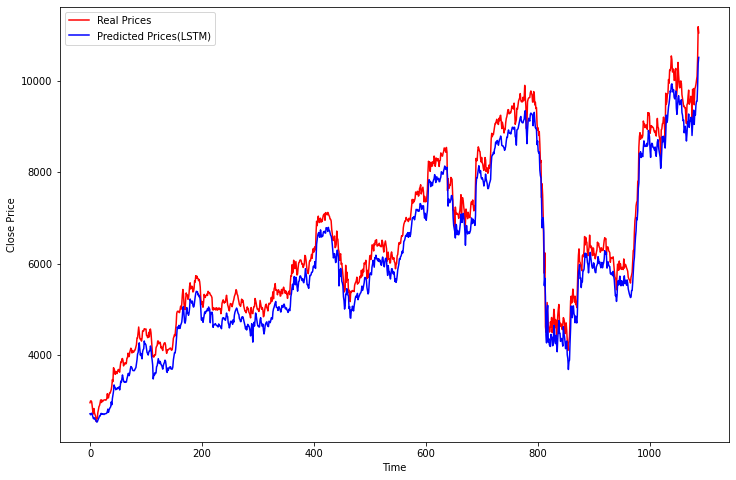

In [135]:
plt.figure(figsize=(12, 8))
plt.plot(y_testLSTM, color='red', label='Real Prices')
plt.plot(y_hatLSTM, color='blue', label='Predicted Prices(LSTM)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## SVR - RBF result plot

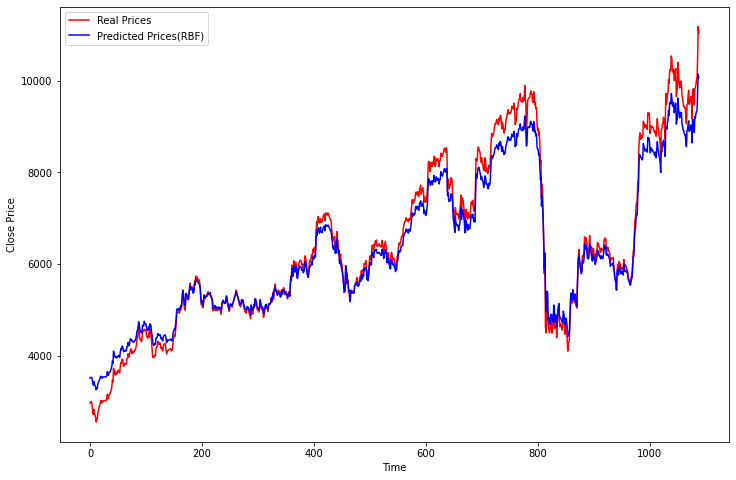

In [136]:
plt.figure(figsize=(12, 8))
plt.plot(y_test, color='red', label='Real Prices')
plt.plot(y_hat_rbf, color='blue', label='Predicted Prices(RBF)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

##SVR - Linear result plot

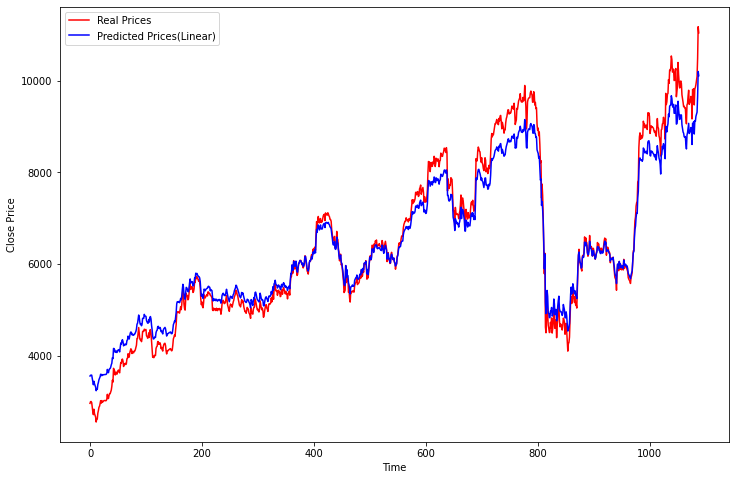

In [137]:
plt.figure(figsize=(12, 8))
plt.plot(y_test, color='red', label='Real Prices')
plt.plot(y_hat_lin, color='blue', label='Predicted Prices(Linear)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## Random Forest result plot

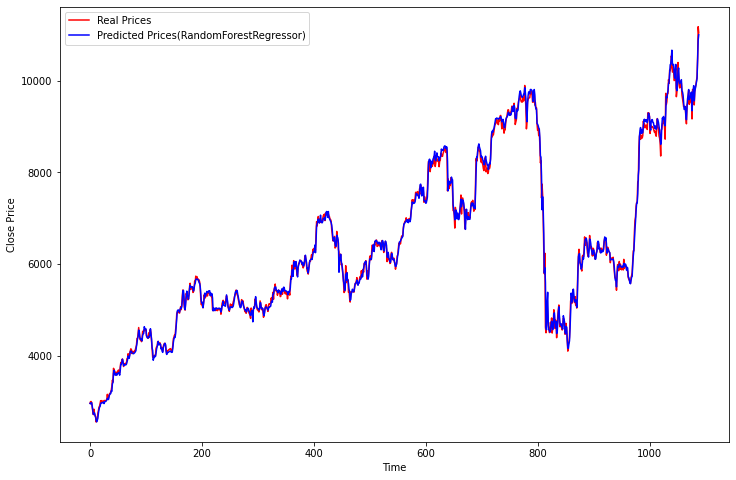

In [138]:
plt.figure(figsize=(12, 8))
plt.plot(y_test, color='red', label='Real Prices')
plt.plot(y_hat_rfr, color='blue', label='Predicted Prices(RandomForestRegressor)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## Gradient Boost result plot

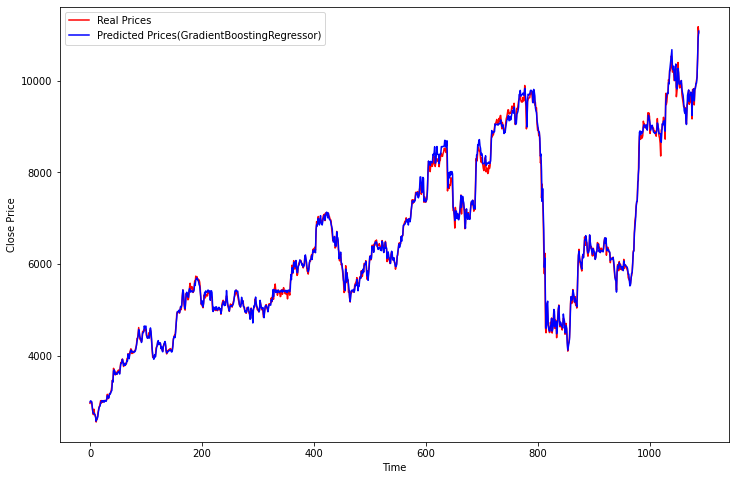

In [139]:
plt.figure(figsize=(12, 8))
plt.plot(y_test, color='red', label='Real Prices')
plt.plot(y_hat_gbr, color='blue', label='Predicted Prices(GradientBoostingRegressor)')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#Performance Metrics - MSE and MAE

In [140]:
MSE_rbf = mean_squared_error(y_hat_rbf, y_test)
MAE_rbf = mean_absolute_error(y_hat_rbf, y_test)

print('MSE for RBF - ', MSE_rbf)
print('MAE for RBF - ', MAE_rbf)

MSE for RBF -  102182.53525859524
MAE for RBF -  244.76600789650345


In [141]:
MSE_lin = mean_squared_error(y_hat_lin, y_test)
MAE_lin = mean_absolute_error(y_hat_lin, y_test)

print('MSE for Lin - ', MSE_lin)
print('MAE for Lin - ', MAE_lin)

MSE for Lin -  126825.07628536088
MAE for Lin -  283.8999926777504


In [142]:
MSE_rfr = mean_squared_error(y_hat_rfr, y_test)
MAE_rfr = mean_absolute_error(y_hat_rfr, y_test)

print('MSE for rfr - ', MSE_rfr)
print('MAE for rfr - ', MAE_rfr)


MSE for rfr -  9013.042900734907
MAE for rfr -  64.18101455366633


In [143]:
MSE_gbr = mean_squared_error(y_hat_gbr, y_test)
MAE_gbr = mean_absolute_error(y_hat_gbr, y_test)

print('MSE for gbr - ', MSE_gbr)
print('MAE for gbr - ', MAE_gbr)

MSE for gbr -  7403.122186201497
MAE for gbr -  56.9998212277345


In [144]:
MSE_LSTM = mean_squared_error(y_hatLSTM, y_testLSTM)
MAE_LSTM = mean_absolute_error(y_hatLSTM, y_testLSTM)

print('MSE for lstm - ', MSE_LSTM)
print('MAE for lstm - ', MAE_LSTM)

MSE for lstm -  151607.34086319798
MAE for lstm -  375.0212739970731
